In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import model_report as mr
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df_test = pd.read_csv('C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\test_comp_nouns_v1.csv')

In [3]:
#load data... this data is the optimal 4100 features we identified
X_train = pickle.load(open('tv_train_features_sub.pkl','rb'))
X_test = pickle.load(open('tv_test_features_sub.pkl','rb'))
#X_holdout = pickle.load(open('tv_holdout_features_sub.pkl','rb'))

#load labels
y_train = pickle.load(open('train_label.pkl','rb'))
y_test = pickle.load(open('test_label.pkl','rb'))
#y_holdout = pickle.load(open('holdout_label.pkl','rb'))

#save TFIDFVectorizer to disk
#pickle.dump(tv,open('TFIDFVectorizer.pkl','wb'))

In [4]:
#load models
svm_rbf = pickle.load(open('svm_rbf_comp_nouns_v1.sav','rb'))
svm_lin = pickle.load(open('svm_comp_nouns_v1.sav','rb'))
sgd_lin = pickle.load(open('sgd_comp_nouns_v1.sav','rb'))
ovo_lin = pickle.load(open('ovo_comp_nouns_v1.sav','rb'))
ovr_lin = pickle.load(open('ovr_comp_nouns_v1.sav','rb'))

In [5]:
#get model predictions on test set
svm_rbf_predictions = svm_rbf.predict(X_test)
svm_lin_predictions = svm_lin.predict(X_test)
sgd_lin_predictions = sgd_lin.predict(X_test)
ovo_lin_predictions = ovo_lin.predict(X_test)
ovr_lin_predictions = ovr_lin.predict(X_test)

In [6]:
df_test_results = pd.DataFrame(list(zip(df_test['clean_comp_nouns'],y_test,svm_rbf_predictions,svm_lin_predictions,sgd_lin_predictions,ovo_lin_predictions,ovr_lin_predictions)),columns = ['terms','category','svm_rbf_pred','svm_lin_pred','sgd_lin_pred','ovo_lin_pred','ovr_lin_pred'])
df_test_results['majority'] = df_test_results[['svm_rbf_pred','svm_lin_pred','sgd_lin_pred','ovo_lin_pred','ovr_lin_pred']].mode(axis=1)[0]
df_test_results['match'] = np.where(df_test_results['category']==df_test_results['majority'],1,0)

In [7]:
rpt = mr.generate_report(df_test_results)
rpt

{'totalSamples': 8386,
 'overallAccuracy': 0.8671595516336752,
 'byCategory': {'sx': {'totalSamples': 1345, 'accuracy': 0.9933085501858736},
  'dr': {'totalSamples': 307, 'accuracy': 0.9446254071661238},
  'ed': {'totalSamples': 783, 'accuracy': 0.8812260536398467},
  'sp': {'totalSamples': 494, 'accuracy': 0.8805668016194332},
  'bu': {'totalSamples': 2355, 'accuracy': 0.8713375796178344},
  'mk': {'totalSamples': 1709, 'accuracy': 0.7981275599765945},
  'os': {'totalSamples': 1393, 'accuracy': 0.7932519741564967}}}

Confusion matrix, without normalization
[[1105   18    3   11  178    1   77]
 [   5  690    0    8   28    0   52]
 [   6    1  290    0    6    1    3]
 [  12    5    0  435   35    3    4]
 [ 102   16    0   23 1364    1  203]
 [   1    0    0    1    6 1336    1]
 [  60   20    1    3  217    2 2052]]


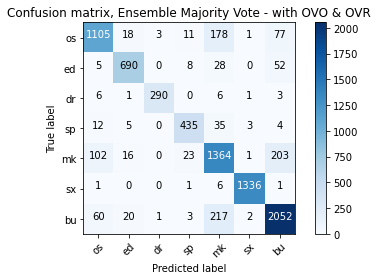

In [8]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(df_test_results['category'],df_test_results['majority'],labels=['os','ed','dr','sp','mk','sx','bu'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
mr.plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, Ensemble Majority Vote - with OVO & OVR')

In [9]:
#let's look at some of the misclassifications to get an idea of why they were misclassified
pd.set_option('display.max_colwidth', None)
df_test_results[(df_test_results.majority == 'sx') & (df_test_results.match == 0)]

terms  \
1787                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [10]:
df_test_results[df_test_results.match == 0]

,terms,category,svm_rbf_pred,svm_lin_pred,sgd_lin_pred,ovo_lin_pred,ovr_lin_pred,majority,match
2,filters sales faq service tech history construction precision transfer world class part department farmall son locations landscaping toothbar cub staff maine family business login equipment farming filters moisture tester bucket phone befco two person operation part inventory job tractor toothbar teeth kubota tools department work service guide tools tractor attachment hitch price prompt messick family blog careers stihl bush hog support sale accessories sale staff apparel stihl hats stihl collectibles pedal tractors equipment sales agriculture new equipment used equipment service hats new collectibles sitemap rtv cub cadet advertisements repair products parts department parts department tester tractor toys ken equipment rental parts department messicks messick scale equipment sales equipment sales segment customer kubota cub cadet woods bush hog parts dealer parts diagrams equipment supplies precision halifax holland troy new holland work lights dealer customer kubota hats grandchild scott department diagrams us pin skiis tractor radios nozzles fleet service department service department new holland pequea steiner turf troy turf pumps scale shirts tractor seats maintance scott us locations history careers equipment rental messicks blog messicks blog parts hotline ih brother company inventory alamo service guide moisture service operation woods rental lights pedal kubota tractor bryan rental rates sitemap faq contact alamo befco brillion bush hog case ih cub cadet ferris krone equipment founder scale brillion hats kubota brother marlin employee skiis chargers construction equipment service product segment sales farming bale contact shirts equipment product messicks hats outwear bucket world business new holland case ih cadet parts phone call part tow bale use elizabethtown dealership product teeth rates holland online carlisle scale odd product hats farmall scale founder merville ferris case ih used equipment used equipment current advertisements class call source ropes implement hog family dealer steiner department grandchild battery location clevis merville marlin person apparel stihl hotline krone messicks fuel range ih hats rental kubota toys collectibles troy bilt woods supplies hardware hitch pin apparel holland attachment tech current california kubota rtv accessories apparel radios neil service department line case hardware clevis sprayer tips tow ropes fuel transfer pumps battery chargers fuel nozzles seats abbottstown carlisle location online parts tips checkout parts new kevin year agriculture pequea merville messick construction maintenance factory bob sprayer bush bilt,bu,mk,mk,bu,mk,mk,mk,0
5,year fertility rate bird somerset black marans originate hens buff login first time chicken owner customer chicken new breeds rare poultry haytor reach haytor reach rare poultry valid xhtml red bantam sablepoot bantam blue splash sale conservation special day price smallholder egg farm gold bantam silver millefleur sablepoot millefleur pekin support pekin westcountry rate valid specialist orpington columbian blue hen french red partridge scs hatching countryside main partridge fertility pyle society silkie blue fowl lemon pyle delivery haytor reach rare poultry rare breeds reach banner market breed main navigation jump millefleur monday market next egg poultry farm buff mottled sablepoots chickens jump eggs silkie dorset us breed information main menu home conservation breeds contact us customer login search banner banner breeds shop pause menu silver haytor reach marans quality chicken columbian lavender gold millefleur sablepoots british blue marans vorwerk bantam millefleur pekin buff mottled sablepoot bantam silver millefleur sablepoot sablepoot content time grass traditional lemon lines list black next play pause porcelain thursday silkie white silkie buff orpington uk breed sablepoot availability poultry special next run q

In [11]:
# file_out = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\ensemble_misclassifications_v1.csv"
# df_test_results[df_test_results.match == 0].to_csv(file_out,index=False)